# How to Decompose Time Series Data into Trend and Seasonality
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

## Time Series Components
* Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
* Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.

## Additive Model
An additive model suggests that the components are added together as follows:

* y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

## Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:

* y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## Decomposition as a tool
You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

## Automatic Time Series Decomposition
There are methods to automatically decompose a time series.

The **statsmodels library** provides an implementation of the naive, or classical, decomposition method in a function called **seasonal_decompose()**. It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

For example, the snippet below shows how to decompose a series into trend, seasonal, and residual components assuming an additive model.

The result object provides access to the trend and seasonal series as arrays. It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed. Finally, the original or observed data is also stored.



In [ ]:
# Decompose series

from statsmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

In [ ]:
# plot 4 series from above

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ...
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

## Additive Decomposition
We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the period=1 argument). If a Pandas Series object is provided, this argument is not required.

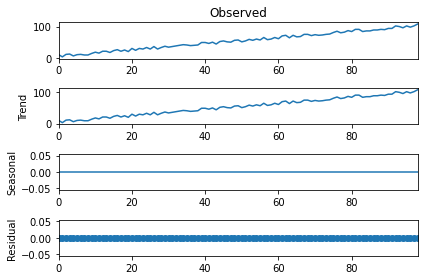

In [1]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

# We can see that the entire series was taken as the trend component and that there was no seasonality.

We can see that the entire series was taken as the trend component and that there was no seasonality.

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

The naive decomposition method is a simple one, and there are more advanced decompositions available, like Seasonal and Trend decomposition using **Loess** or **STL decomposition**.

## Multiplicative Decomposition
We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

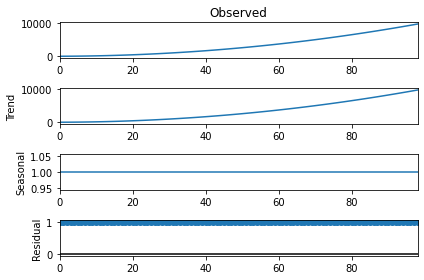

In [2]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

Again, it is important to treat decomposition as a potentially useful analysis tool, but to consider exploring the many different ways it could be applied for your problem, such as on data after it has been transformed or on residual model errors.

## Airline Passengers Dataset
The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.

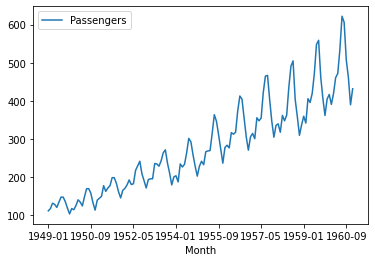

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
series.plot()
pyplot.show()

Reviewing the line plot, it suggests that there may be a linear trend, but it is hard to be sure from eye-balling. There is also seasonality, but the amplitude (height) of the cycles appears to be increasing, suggesting that it is multiplicative.

We will assume a multiplicative model.

The example below decomposes the airline passengers dataset as a multiplicative model.

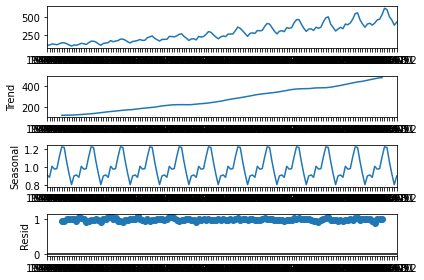

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative', period = 12)
result.plot()
pyplot.show()


Running the example plots the observed, trend, seasonal, and residual time series.

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the early and later years of the series.